    Install modules

In [1]:
import geopandas as gpd #gpd for creating geodatabases, tables with geometry data
import matplotlib.pyplot as plt 
import pandas as pd

Load crime data data 

In [2]:
crime = gpd.read_file('crimeDataEdit3.csv') #load point data csv
crime.crs = 'epsg:27700' #set point crs
crime.head #display head of point gdf

<bound method NDFrame.head of                                             WKT    Month              X  \
0     POINT (599261.905971669 249257.230574292)  2022-02  0.90825100000   
1     POINT (599365.899443736 249576.241500435)  2022-02  0.90995400000   
2     POINT (599261.905971669 249257.230574292)  2022-02  0.90825100000   
3      POINT (599161.89048438 249528.304176689)  2022-02  0.90695100000   
4      POINT (599161.89048438 249528.304176689)  2022-02  0.90695100000   
...                                         ...      ...            ...   
4471                                POINT EMPTY  2022-02  0.00000000000   
4472                                POINT EMPTY  2022-02  0.00000000000   
4473                                POINT EMPTY  2022-02  0.00000000000   
4474                                POINT EMPTY  2022-02  0.00000000000   
4475                                POINT EMPTY  2022-02  0.00000000000   

                   Y                    Crime_type  \
0     52.105755

Load parish data

In [3]:
parishes = gpd.read_file('parishBound.csv') #load polygon data csv
parishes.crs = 'epsg:27700' #set polygon crs
parishes.head #display head of polygon gdf

<bound method NDFrame.head of                                                    WKT OBJECTID PD_ID  \
0    MULTIPOLYGON (((601704.701 253781.905,601737.4...     1534  MRNG   
1    MULTIPOLYGON (((604662.501 255212.495,604688.3...     1535  MBTT   
2    MULTIPOLYGON (((602301.998 251004.6,602329.998...     1536  MGBR   
3    MULTIPOLYGON (((600038.201 261253.496,600071.0...     1537  MSHE   
4    MULTIPOLYGON (((600928.099 258621.3,600937.004...     1538  MGFI   
..                                                 ...      ...   ...   
772  MULTIPOLYGON (((604662.501 255212.495,604698.3...    28945  MBDL   
773  MULTIPOLYGON (((607822.1 255743.803,607830.303...    28946  MNMN   
774  MULTIPOLYGON (((608122.698 254787.397,608126.4...    28947  MNMS   
775  MULTIPOLYGON (((601334.102 254683.297,601346.8...    28948  MCOM   
776  MULTIPOLYGON (((601208.101 254865.105,601225.5...    28949  MLFI   

             County            Distric_Bo                         Ward  \
0    Suffolk County

Test gdf have same crs

In [4]:
print(crime.crs == parishes.crs) #confirm both gdf set to same crs

True


Display gdf layer

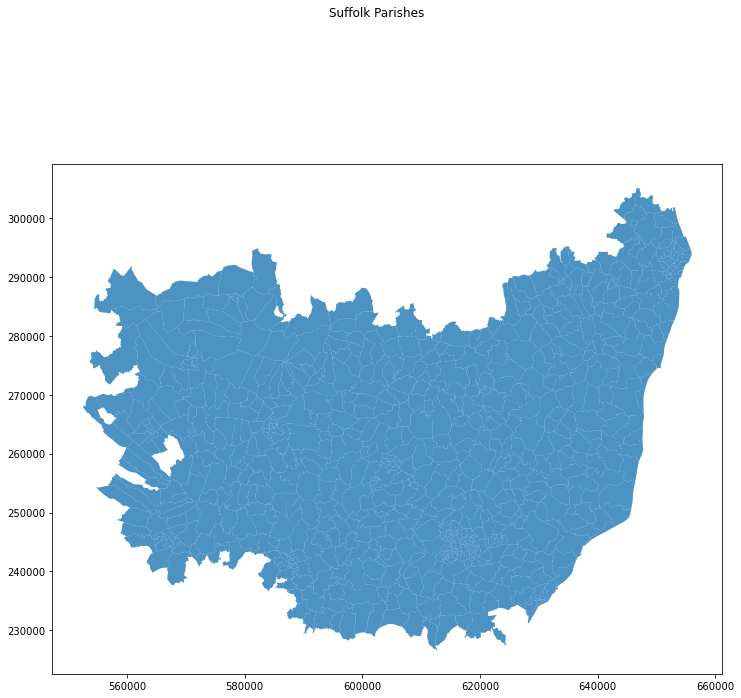

In [5]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = parishes.plot(ax=ax, alpha=0.8) #adjust alpha value to change colour intensity
#ax.set_axis_off()  #uncomment this line to remove national grid numbers
f.suptitle('Suffolk Parishes') #set plot title
plt.show() 

Load a single parish using row number

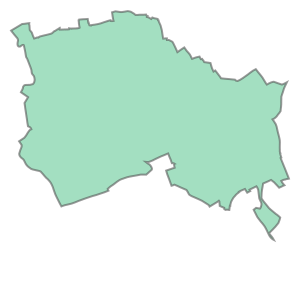

In [6]:
parishes.loc[0, 'geometry'] #adjust number to select parish

Plot data to scattergraph showing grid references. 

<AxesSubplot:>

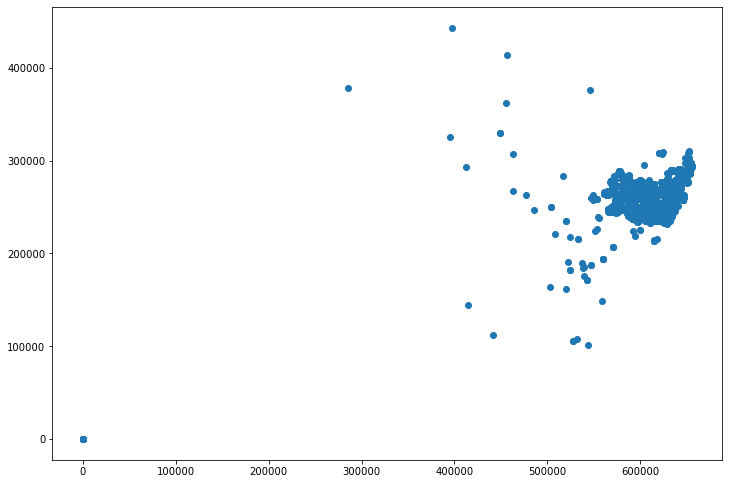

In [7]:
crime.plot(figsize=(12,10)) #display point data with nat grid to check AOI

Clip the crime gdf data to the parish gdf so it only shows crimes taking place in Suffolk Parishes

In [8]:
clipped = [] #create an empty list 
for parish in parishes['Parish'].unique(): #iterate over polygon table for unique instances of a value ['Parish']
    tmp_clip = gpd.clip(crime, parishes[parishes['Parish'] == parish]) #clip point data to those which have a matching 'Parish'
    clipped.append(tmp_clip) #populate clipped list with points clipped to polygons

clipped_gdf = gpd.GeoDataFrame(pd.concat(clipped)) 
clip_total = clipped_gdf.count()

clip_total

WKT           4358
Month         4358
X             4358
Y             4358
Crime_type    4358
geometry      4358
dtype: int64

Rename clipped_gdf to crimes and set CRS to 27700. Display clipped crime scattergraph

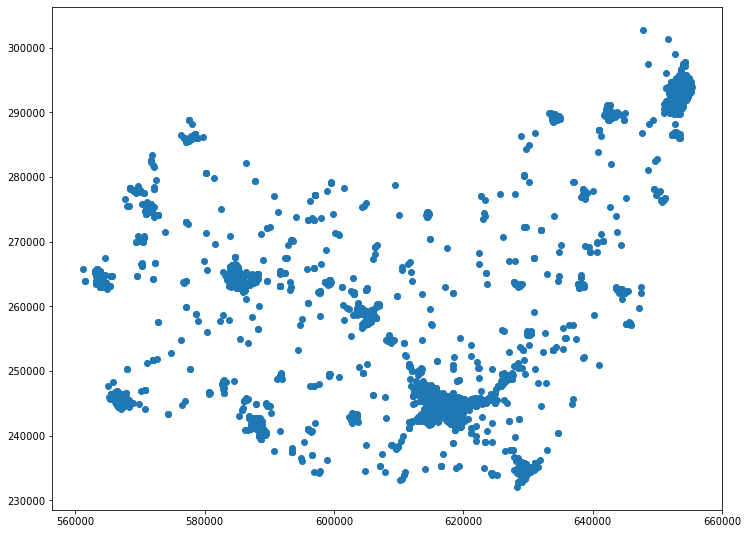

In [9]:
crimes = clipped_gdf #rename clipped gdf 
crimes.crs = 'epsg:27700' #set new points gdf crs
crimes.plot(figsize=(12,10)); #display new point plot to confirm contained to AOI

Plot clipped crime points over parish map

<AxesSubplot:>

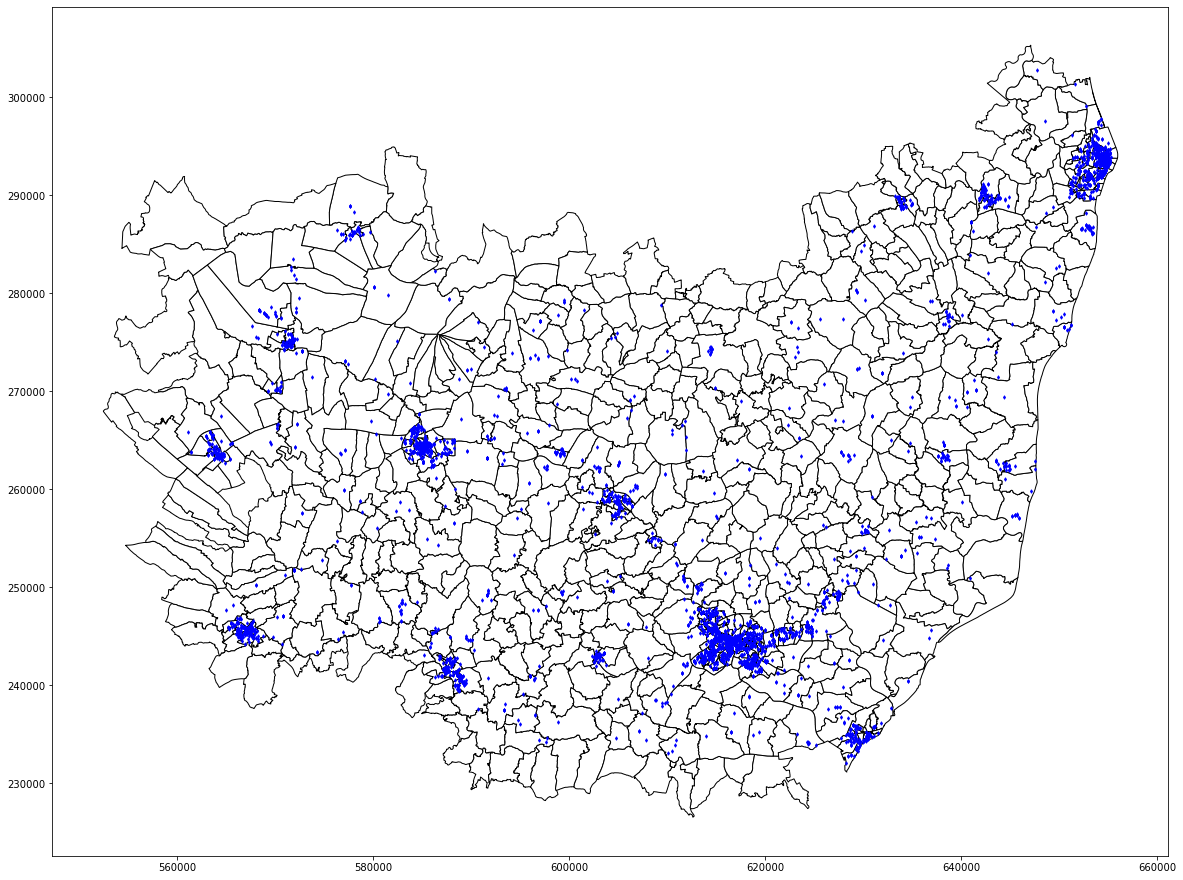

In [10]:
base = parishes.plot(figsize = (20,18), color='white', edgecolor='black') #use polygon layer as a base

crimes.plot(ax=base, marker='d', color='blue', markersize=5) #display point layer on top of base

Join the two tables, crimes and parish

In [11]:
join = gpd.sjoin(parishes, crimes, how='inner', lsuffix='left', rsuffix='right') #perform the spatial join
join # show the joined table

,WKT_left,OBJECTID,PD_ID,County,Distric_Bo,Ward,Parish,geometry,index_right,WKT_right,Month,X,Y,Crime_type
2,"MULTIPOLYGON (((602301.998 251004.6,602329.998...",1536,MGBR,Suffolk County,Mid Suffolk District,Battisford & Ringshall Ward,Great Bricett CP,"MULTIPOLYGON (((602301.998 251004.600, 602329....",2272,POINT (603920.936556142 250661.180287565),2022-02,0.97702400000,52.11666400000,Anti-social behaviour
2,"MULTIPOLYGON (((602301.998 251004.6,602329.998...",1536,MGBR,Suffolk County,Mid Suffolk District,Battisford & Ringshall Ward,Great Bricett CP,"MULTIPOLYGON (((602301.998 251004.600, 602329....",2273,POINT (605155.963871697 251138.265054078),2022-02,0.99532300000,52.12049100000,Burglary
4,"MULTIPOLYGON (((600928.099 258621.3,600937.004...",1538,MGFI,Suffolk County,Mid Suffolk District,Onehouse Ward,Great Finborough CP,"MULTIPOLYGON (((600928.099 258621.300, 600937....",2161,POINT (601466.87963432 257915.110098903),2022-02,0.94553100000,52.18269400000,Burglary
5,"MULTIPOLYGON (((600220.401 259177.101,600248.5...",1539,MONE,Suffolk County,Mid Suffolk District,Onehouse Ward,Onehouse CP,"MULTIPOLYGON (((600220.401 259177.101, 600248....",2164,POINT (602865.88762386 258661.147032688),2022-02,0.96641100000,52.18888000000,Vehicle crime
5,"MULTIPOLYGON (((600220.401 259177.101,600248.5...",1539,MONE,Suffolk County,Mid Suffolk District,Onehouse Ward,Onehouse CP,"MULTIPOLYGON (((600220.401 259177.101, 600248....",2163,POINT (602384.869897096 259599.095943035),2022-02,0.95994400000,52.19747800000,Public order
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,"MULTIPOLYGON (((608122.698 254787.397,608126.4...",28947,MNMS,Suffolk County,Mid Suffolk District,Needham Market Ward,Needham Market CP,"MULTIPOLYGON (((608122.698 254787.397, 608126....",2264,POINT (608545.945961306 254953.206878453),2022-02,1.04710300000,52.15347400000,Violence and sexual offences
774,"MULTIPOLYGON (((608122.698 254787.397,608126.4...",28947,MNMS,Suffolk County,Mid Suffolk District,Needham Market Ward,Needham Market CP,"MULTIPOLYGON (((608122.698 254787.397, 608126....",2266,POINT (608760.964797195 254977.174199687),2022-02,1.05025600000,52.15360800000,Violence and sexual offences
774,"MULTIPOLYGON (((608122.698 254787.397,608126.4...",28947,MNMS,Suffolk County,Mid Suffolk District,Needham Market Ward,Needham Market CP,"MULTIPOLYGON (((608122.698 254787.397, 608126....",2262,POINT (608434.999115841 254996.106485603),2022-02,1.04551000000,52.15390100000,Other theft
775,"MULTIPOLYGON (((601334.102 254683.297,601346.8...",28948,MCOM,Suffolk County,Mid Suffolk District,Onehouse Ward,Combs CP,"MULTIPOLYGON (((601334.102 254683.297, 601346....",2166,POINT (602626.881063115 255391.155771136),2022-02,0.96096800000,52.15960800000,Violence and sexual offences


Select crime type by parish.

In [12]:
crime_stats = join.groupby(['Parish', 'Crime_type']).count()
print(crime_stats.loc['Sproughton CP']) #Edit to select parish of interest

                              WKT_left  OBJECTID  PD_ID  County  Distric_Bo  \
Crime_type                                                                    
Anti-social behaviour                2         2      2       2           2   
Other crime                          1         1      1       1           1   
Shoplifting                          1         1      1       1           1   
Violence and sexual offences         1         1      1       1           1   

                              Ward  geometry  index_right  WKT_right  Month  \
Crime_type                                                                    
Anti-social behaviour            2         2            2          2      2   
Other crime                      1         1            1          1      1   
Shoplifting                      1         1            1          1      1   
Violence and sexual offences     1         1            1          1      1   

                              X  Y  
Crime_type   

Display the overall number of crimes per parish

In [13]:
print(join.groupby(['Parish'])['Crime_type'].count()) #count number of crimes per parish

Parish
                            1223
Acton CP                       7
Aldeburgh CP                  10
Aldringham cum Thorpe CP       3
Assington CP                   5
                            ... 
Worlingham CP                 13
Worlingworth CP                1
Wortham CP                     1
Wrentham CP                    2
Yoxford CP                     5
Name: Crime_type, Length: 264, dtype: int64


Generate hexbin map 

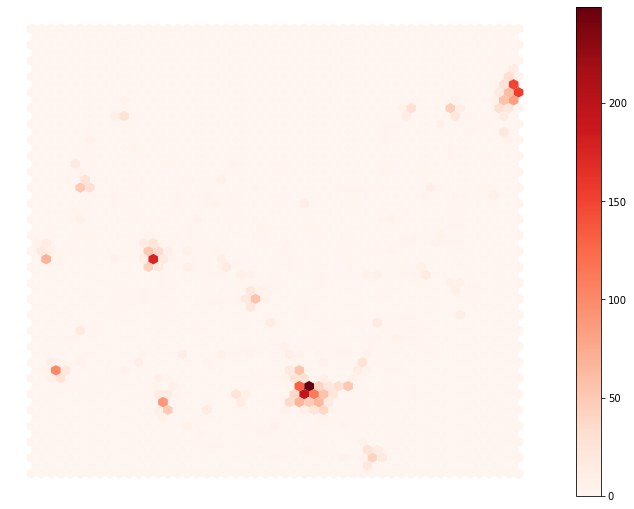

In [14]:
f, ax = plt.subplots(1, figsize=(12, 9))

hb = ax.hexbin(
    crimes['X'], 
    crimes['Y'],
    gridsize=50, # Generate and add hexbin with 50 hexagons in each
    linewidths=0,
    alpha=1, #Fulle colour
    cmap='Reds' #Colour map to match 
)

# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

Generate Choropleth map of crimes report by parish

Some of this may be an unneccesary repeat of an existing join

<AxesSubplot:>

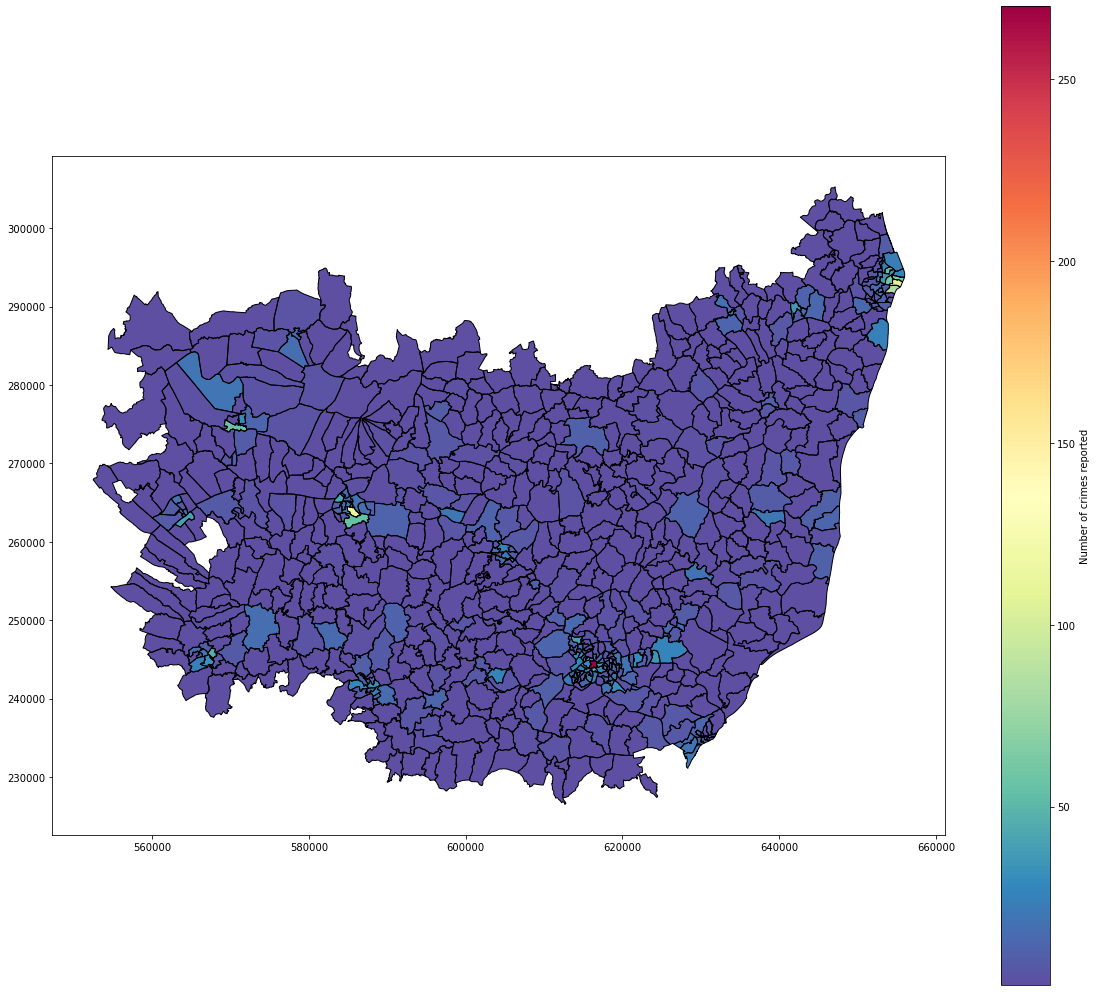

In [15]:
polygons = parishes
polygon_id_field = 'OBJECTID'
points = crimes
points.crs = 'epsg:27700'

join = gpd.sjoin(parishes, crimes, how='left', predicate='contains')
count = join.groupby(polygon_id_field)[polygon_id_field].count()
count.name='pointcount'
polygons = pd.merge(left=polygons, right=count, left_on=polygon_id_field, right_index=True)

fig, ax = plt.subplots(figsize = (20,18))
polygons.plot(column = 'pointcount', cmap = 'Spectral_r', ax=ax, legend=True,
              legend_kwds={'label':'Number of crimes reported'})
polygons.geometry.boundary.plot(color=None, edgecolor='k',linewidth = 1, ax=ax)

Reproduce Parish map, clipped crimes map, and choropleth map.

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Outputs')
axs[0].plot(x, y)
axs[1].plot(x, -y)

base = parishes.plot(figsize = (20,18), color='white', edgecolor='black')

crimes.plot(ax=base, marker='d', color='blue', markersize=5)
